In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import networkx as nx

______________________________

In [78]:
network = 'tarbase'
target_homology = 'mix'

remove_SSD_pre_2R = False
keep_SSD_pre_2R = False

if remove_SSD_pre_2R and keep_SSD_pre_2R:
	raise ValueError("Cannot both remove and keep pre-2R SSD pairs. Choose one option or remove both.")

if remove_SSD_pre_2R:
	s = 'post_2R'
elif keep_SSD_pre_2R:
	s = 'pre_2R'
else:
	s = ''

remove_large_fam = True
if remove_large_fam:
	max_n_nodes = 4
	s += f'cc_largerthan{str(max_n_nodes)}_removed'

In [79]:
if target_homology == 'wgd':
	file_path_1 = f'./output/{network}_om.z_1000.tsv'
	file_path_2 = f'./output/{network}_pm_mixed.z_1000.tsv'
elif target_homology == 'ssd':
	file_path_1 = f'./output/{network}_om_mixed.z_1000.tsv'
	file_path_2 = f'./output/{network}_pm.z_1000.tsv'
elif target_homology == 'mix':
	file_path_1 = f'./output/{network}_om.z_1000.tsv'
	file_path_2 = f'./output/{network}_pm.z_1000.tsv'
else:
	raise ValueError("target_homology must be either 'wgd', 'ssd' or 'mix'")

df_1 = pd.read_csv(file_path_1, sep='\t', header=0)
df_2 = pd.read_csv(file_path_2, sep='\t', header=0)

Define the lca (two sources available: Ensembl or MirGeneDB)

In [1]:
ensembl_mirna_pair_lca_file_path = '../../3_retrieve_Hsa_paralogs/all_hsa_ensembl_paralogmirna_clean.tsv'
df_mirna_pair_lca = pd.read_csv(ensembl_mirna_pair_lca_file_path, sep='\t', header=None)
ensembl_pair_lca_dict = {}
for _, row in df_mirna_pair_lca.iterrows():
	ensembl_pair_lca_dict[(row[1], row[3])] = row[4]
	ensembl_pair_lca_dict[(row[3], row[1])] = row[4]

NameError: name 'pd' is not defined

In [81]:
ordered_lca = {
	'Eumetazoa': 0,
	'Bilateria': 1,
	'Nephrozoa': 2,
	'Chordata': 3,
	'Olfactores': 4,
	'Vertebrata': 5,
	'Gnathostomata': 6,
	'Osteichthyes': 7,
	'Euteleostomi': 8,
	'Sarcopterygii': 9,
	'Tetrapoda': 10,
	'Amniota': 11,
	'Mammalia': 12,
	'Theria': 13,
	'Eutheria': 14,
	'Boroeutheria': 15,
	'Euarchontoglires': 16,
	'Primates': 17,
	'Simiiformes': 18,
	'Catarrhini': 19,
	'Hominidae': 20,
	'Homo_sapiens': 21
}

reverted_ordered_lca = {v: k for k, v in ordered_lca.items()}

In [82]:
df_wgd = df_1
df_ssd = df_2

In [ ]:
def add_lca(df):
    df['lca'] = df.apply(lambda row: ensembl_pair_lca_dict.get((row['miRNA_1'], row['miRNA_2'])), axis=1)
    return df

df_wgd_lca = add_lca(df_wgd)
df_ssd_lca = add_lca(df_ssd)

In [84]:
df_ssd_lca

,miRNA_1,miRNA_2,n_tar_1,n_tar_2,n_common_targets,mu,sigma,n_relevant_bifan,n_maj_true,Z-score,pValue (nm size=1000),lca
0,MIR100,MIR10A,136,272,7,0.039,0.203664,1,37,4.71855746916284,7.278364577700813e-10,Bilateria
1,MIR100,MIR10B,136,141,6,0.010,0.099499,0,1000,-0.10050378152592122,1.0,Bilateria
2,MIR100,MIR125A,136,306,8,0.051,0.219998,0,1000,-0.23182057667122008,1.0,Bilateria
3,MIR100,MIR125B1,136,270,7,0.036,0.206649,0,1000,-0.17420805122188895,1.0,Bilateria
4,MIR100,MIR125B2,136,367,12,0.061,0.239330,0,1000,-0.25487786546614705,1.0,Bilateria
...,...,...,...,...,...,...,...,...,...,...,...,...
1378,MIRLET7F1,MIRLET7G,543,620,453,2.101,1.781797,55,0,29.688574459705773,0.0,Bilateria
1379,MIRLET7F1,MIRLET7I,543,478,436,1.325,1.313535,55,0,40.86300517124271,0.0,Euteleostomi
1380,MIRLET7F2,MIRLET7G,519,620,453,1.929,1.585547,56,0,34.102428442800985,0.0,Vertebrata
1381,MIRLET7F2,MIRLET7I,519,478,436,1.244,1.352207,55,0,39.75426590125101,0.0,Bilateria


In [85]:
print("Number of WGD pairs: ", len(df_wgd_lca))
print("Number of SSD pairs: ", len(df_ssd_lca))

Number of WGD pairs:  113
Number of SSD pairs:  1383


In [86]:
df_ssd_lca

,miRNA_1,miRNA_2,n_tar_1,n_tar_2,n_common_targets,mu,sigma,n_relevant_bifan,n_maj_true,Z-score,pValue (nm size=1000),lca
0,MIR100,MIR10A,136,272,7,0.039,0.203664,1,37,4.71855746916284,7.278364577700813e-10,Bilateria
1,MIR100,MIR10B,136,141,6,0.010,0.099499,0,1000,-0.10050378152592122,1.0,Bilateria
2,MIR100,MIR125A,136,306,8,0.051,0.219998,0,1000,-0.23182057667122008,1.0,Bilateria
3,MIR100,MIR125B1,136,270,7,0.036,0.206649,0,1000,-0.17420805122188895,1.0,Bilateria
4,MIR100,MIR125B2,136,367,12,0.061,0.239330,0,1000,-0.25487786546614705,1.0,Bilateria
...,...,...,...,...,...,...,...,...,...,...,...,...
1378,MIRLET7F1,MIRLET7G,543,620,453,2.101,1.781797,55,0,29.688574459705773,0.0,Bilateria
1379,MIRLET7F1,MIRLET7I,543,478,436,1.325,1.313535,55,0,40.86300517124271,0.0,Euteleostomi
1380,MIRLET7F2,MIRLET7G,519,620,453,1.929,1.585547,56,0,34.102428442800985,0.0,Vertebrata
1381,MIRLET7F2,MIRLET7I,519,478,436,1.244,1.352207,55,0,39.75426590125101,0.0,Bilateria


In [87]:
pre_2R_clades = ['Bilateria', 'Chordata', 'Eumetazoa', 'Vertebrata', 'Nephrozoa', 'Olphactores']

if remove_SSD_pre_2R:
	df_ssd_lca = df_ssd_lca[~df_ssd_lca['lca'].isin(pre_2R_clades)]
if keep_SSD_pre_2R:
	df_ssd_lca = df_ssd_lca[df_ssd_lca['lca'].isin(pre_2R_clades)]

print("Number of WGD pairs: ", len(df_wgd_lca))
print("Number of SSD pairs: ", len(df_ssd_lca))

Number of WGD pairs:  113
Number of SSD pairs:  1383


In [88]:
def remove_large_cc(df, max_size):
    df['Z-score'] = pd.to_numeric(df['Z-score'], errors='coerce')
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row['miRNA_1'], row['miRNA_2'])

    # Identify connected components
    large_components = [comp for comp in nx.connected_components(G) if len(comp) > max_size]

    if not large_components:
        return df

    # Process each large component separately
    indices_to_keep = set()

    for comp in large_components:
        comp_df = df[(df['miRNA_1'].isin(comp)) & (df['miRNA_2'].isin(comp))]
        top_pairs = comp_df.nlargest(max_size, 'Z-score')
        #indices_to_keep.update(top_pairs.index)

    # Identify edges to retain from small components
    small_components = [comp for comp in nx.connected_components(G) if len(comp) <= max_size]
    for comp in small_components:
        comp_df = df[(df['miRNA_1'].isin(comp)) & (df['miRNA_2'].isin(comp))]
        indices_to_keep.update(comp_df.index)

    return df.loc[sorted(indices_to_keep)].reset_index(drop=True)

In [89]:
def remove_mirna_pairs(df1, df2):
	"""
	Removes from df1 all rows whose (miRNA_1, miRNA_2) pairs (regardless of order)
	are present in df2.
	"""
	# Create a set of tuples for the miRNA pairs in df2
	mirna_pairs = set()
	for _, row in df2.iterrows():
		mirna1 = row['miRNA_1']
		mirna2 = row['miRNA_2']
		if mirna1 != mirna2:
			mirna_pairs.add(tuple(sorted([mirna1, mirna2])))

	# Filter df1 to remove rows with miRNA pairs present in df2
	filtered_df = df1[~df1.apply(lambda row: tuple(sorted([row['miRNA_1'], row['miRNA_2']])) in mirna_pairs, axis=1)]
	
	return filtered_df


df_ssd_lca = remove_mirna_pairs(df_ssd_lca, df_wgd_lca)

print("Number of WGD pairs after removing miRNA pairs from SSD: ", len(df_wgd_lca))
print("Number of SSD pairs after removing miRNA pairs from SSD: ", len(df_ssd_lca))

Number of WGD pairs after removing miRNA pairs from SSD:  113
Number of SSD pairs after removing miRNA pairs from SSD:  1271


In [90]:
# if the column Z-score is equal to "sigma_err" and the column "n_relevant_bifan" is equal to 0, then the Z-score is equal to 0
def remove_sigma_err(df):
    # Step 1: Set Z-score to 0 if Z-score == 'sigma_err' and n_relevant_bifan == 0
    mask_fix = (df['Z-score'] == 'sigma_err') & (df['n_relevant_bifan'] == 0)
    df.loc[mask_fix, 'Z-score'] = 0

    # Step 2: Remove rows where Z-score == 'sigma_err' and n_relevant_bifan != 0
    mask_remove = (df['Z-score'] == 'sigma_err') & (df['n_relevant_bifan'] != 0)
    df = df[~mask_remove]

    return df

if remove_large_fam:
	max_n_nodes = 4
	df_ssd_lca_parsed = remove_large_cc(remove_sigma_err(df_ssd_lca), max_n_nodes)
	df_wgd_lca_parsed = remove_large_cc(remove_sigma_err(df_wgd_lca), max_n_nodes)
else:
	df_ssd_lca_parsed = remove_sigma_err(df_ssd_lca)
	df_wgd_lca_parsed = remove_sigma_err(df_wgd_lca)

/tmp/ipykernel_1680/4003812063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Z-score'] = pd.to_numeric(df['Z-score'], errors='coerce')


In [91]:
df_wgd_lca_zscores = df_wgd_lca_parsed['Z-score'].astype(float)
df_ssd_lca_zscores = df_ssd_lca_parsed['Z-score'].astype(float)

df_wgd_lca_nbifan = df_wgd_lca_parsed['n_relevant_bifan'].astype(int)
df_ssd_lca_nbifan = df_ssd_lca_parsed['n_relevant_bifan'].astype(int)

In [92]:
n_wgd = len(df_wgd_lca_zscores)
n_ssd = len(df_ssd_lca_zscores)

print("n_wgd in the boxplot: ", n_wgd)
print("n_ssd in the boxplot: ", n_ssd)

n_wgd in the boxplot:  113
n_ssd in the boxplot:  48


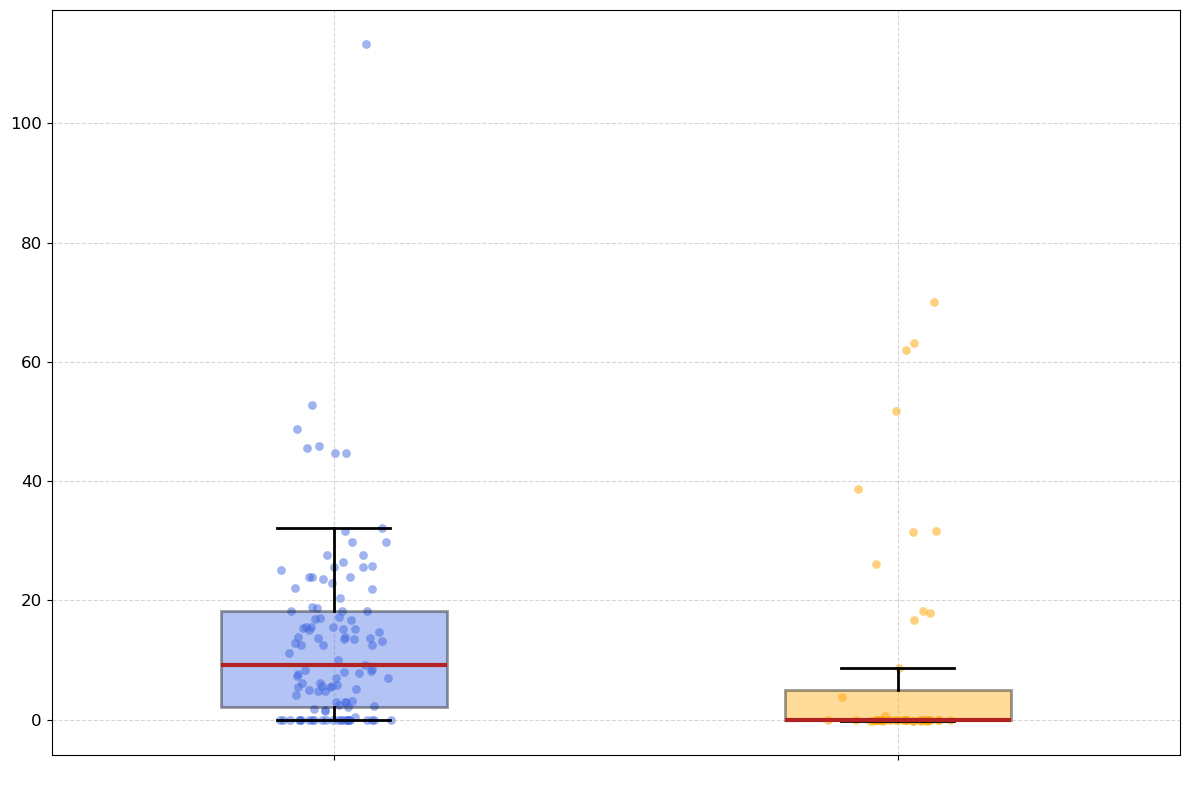

Number of WGD pairs: 113
Number of SSD pairs: 48


In [93]:
data = [df_wgd_lca_zscores, df_ssd_lca_zscores]
positions = [0, 1]
colors = ['royalblue', 'orange']

plt.figure(figsize=(12, 8))

box = plt.boxplot(data, 
                  positions=positions, 
                  widths=0.4,
                  patch_artist=True, 
                  showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
    patch.set_alpha(0.4)
    
for element in ['whiskers', 'caps']:
    for line in box[element]:
        line.set_linewidth(2)
        line.set_color('black')
        
for element in ['medians']:
    for line in box[element]:
        line.set_linewidth(3)
        line.set_color('firebrick')

for i, (scores, color) in enumerate(zip(data, colors)):
    jittered_x = np.random.normal(loc=positions[i], scale=0.05, size=len(scores))
    plt.scatter(jittered_x, scores, alpha=0.5, color=color, linewidth=0.2, label=['', ''][i])

plt.xticks(positions, [' ', ' '], fontsize=100)
#plt.ylim(-3, 75)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

print(f"Number of WGD pairs: {len(df_wgd_lca_parsed)}")
print(f"Number of SSD pairs: {len(df_ssd_lca_parsed)}")

In [94]:
ks_stat, ks_p_value = stats.ks_2samp(df_wgd_lca_zscores, df_ssd_lca_zscores)
print(f"KS test results with parameters:\nnetwork={network}\ntarget_homology={target_homology}\nremove_pre_2R={remove_SSD_pre_2R}")
print(100 * "=")
print(f"KS statistic: {ks_stat}, p-value: {ks_p_value}")

KS test results with parameters:
network=tarbase
target_homology=mix
remove_pre_2R=False
KS statistic: 0.5079277286135693, p-value: 1.7968642921907982e-08


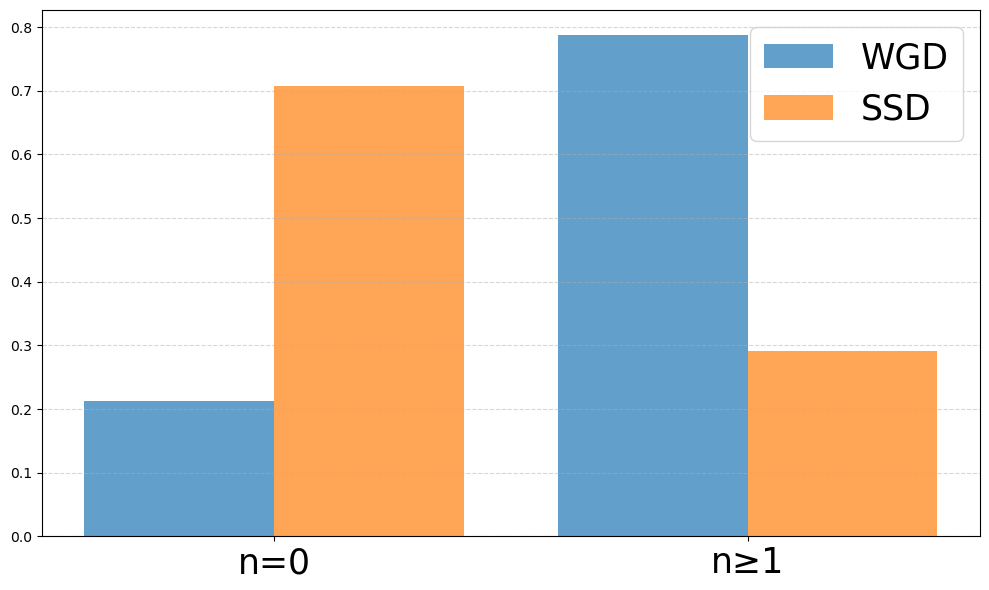

In [95]:
labels = ['n=0', 'n≥1']

def bin_bifans(count, labels=labels):
    if count == 0:
        return labels[0]
    else:
        return labels[1]

# Bin the counts
wgd_binned = pd.Series(df_wgd_lca_nbifan).apply(bin_bifans)
ssd_binned = pd.Series(df_ssd_lca_nbifan).apply(bin_bifans)

# Get relative frequencies for each bin
wgd_freq = wgd_binned.value_counts(normalize=True).reindex(labels, fill_value=0)
ssd_freq = ssd_binned.value_counts(normalize=True).reindex(labels, fill_value=0)

x = np.arange(len(labels))
width = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, wgd_freq, width=width, label='WGD', alpha=0.7)
plt.bar(x + width/2, ssd_freq, width=width, label='SSD', alpha=0.7)

plt.xticks(x, labels, fontsize=25)
plt.xlabel('')
plt.title('')
plt.legend(fontsize=25)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

________________________________________

## Subgenome analysis

In [96]:
subg_file = '../../1.1_retrieve_Hsa_ohnomirnas/gnathostomata_ohnolog_reference_singlecol.gene.tsv'
df_subg = pd.read_csv(subg_file, sep='\t', header=None)
cols = ['miRNA', 'subgenome', 'CLG']
df_subg.columns = cols
df_subg

,miRNA,subgenome,CLG
0,MIR1-1,1beta,J
1,MIR1-2,1alpha,J
2,MIR100,1beta,A
3,MIR101-1,1alpha,L
4,MIR101-2,2alpha,L
...,...,...,...
163,MISSING,2beta,J
164,MISSING,2beta,L
165,MISSING,2beta,M
166,MISSING,2beta,N


In [97]:
def label_subgenome(df_dup, df_subg, prefix):
    # Create a dictionary from df_subg (miRNA -> subgenome)
    subg_dict = dict(zip(df_subg['miRNA'], df_subg['subgenome']))

    # Function to translate and label each miRNA
    def translate_miRNA(miRNA):
        miRNA_clean = miRNA.replace(prefix, "")
        return subg_dict.get(miRNA_clean, 'unknown')

    # Apply the translation to miRNA_1 and miRNA_2
    df_dup[f'subg_1'] = df_dup['miRNA_1'].apply(translate_miRNA)
    df_dup[f'subg_2'] = df_dup['miRNA_2'].apply(translate_miRNA)

    return df_dup

df_wgd_lca_parsed_subg = label_subgenome(df_wgd_lca_parsed, df_subg, '')

In [98]:
df_wgd_lca_parsed_subg

,miRNA_1,miRNA_2,n_tar_1,n_tar_2,n_common_targets,mu,sigma,n_relevant_bifan,n_maj_true,Z-score,pValue (nm size=1000),lca,subg_1,subg_2
0,MIR101-1,MIR101-2,190,159,159,0.006,0.077227,0,1000,-0.077693,1.000000e+00,Euteleostomi,1alpha,2alpha
1,MIR103A1,MIR103A2,950,1075,950,2.990,1.744104,33,0,17.206539,3.394947e-09,Vertebrata,2beta,2alpha
2,MIR103A1,MIR107,950,959,927,2.576,1.635917,30,0,16.763688,2.413952e-09,Vertebrata,2beta,1alpha
3,MIR103A2,MIR107,1075,959,930,3.009,1.730005,30,0,15.601685,1.290864e-07,Euteleostomi,2alpha,1alpha
4,MIR106A,MIR106B,538,398,205,0.214,0.456294,3,0,6.105716,3.382723e-09,None,1beta,2beta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,MIRLET7A2,MIRLET7E,926,355,262,0.486,0.744180,5,1,6.065736,8.317223e-07,Euteleostomi,2beta,2alpha
109,MIRLET7C,MIRLET7E,328,355,247,0.085,0.289439,5,0,16.981119,0.000000e+00,Euteleostomi,1beta,2alpha
110,MIRLET7D,MIRLET7G,614,620,215,0.618,0.818582,1,448,0.466661,4.609786e-01,Bilateria,1alpha,1beta
111,MIRLET7D,MIRLET7I,614,478,202,0.383,0.651392,2,60,2.482378,7.045534e-03,Vertebrata,1alpha,2alpha


/tmp/ipykernel_1680/3478736363.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


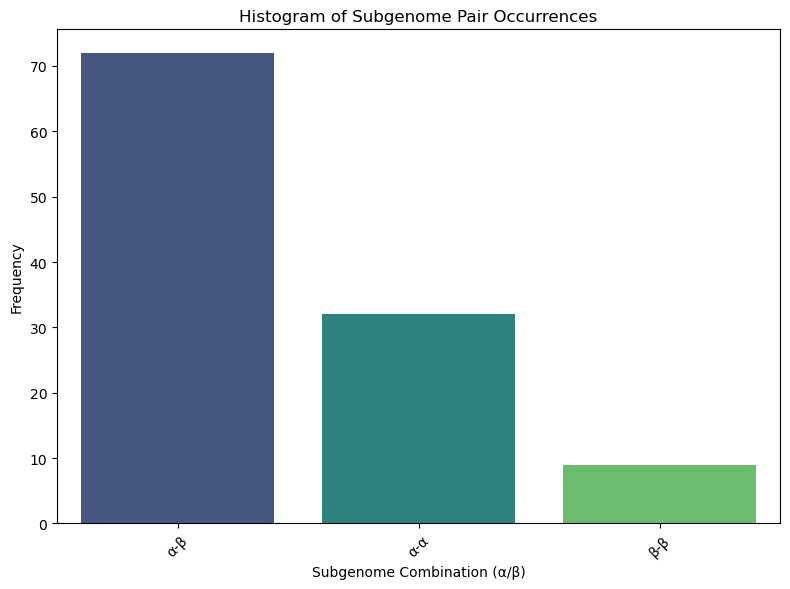

In [ ]:
# Reset the subgenome_combination column
if 'subgenome_combination' in df_wgd_lca_parsed_subg.columns:
    df_wgd_lca_parsed_subg.drop(columns=['subgenome_combination'], inplace=True)

# Create a new column combining both subgenome labels, ignoring numbers and using Greek letters
df_wgd_lca_parsed_subg['subgenome_combination'] = df_wgd_lca_parsed_subg.apply(
    lambda row: '-'.join(sorted([row.iloc[-2].strip('12').replace('alpha', 'α').replace('beta', 'β'),
                                 row.iloc[-1].strip('12').replace('alpha', 'α').replace('beta', 'β')])), axis=1
)

# Count occurrences of each combination
counts = df_wgd_lca_parsed_subg['subgenome_combination'].value_counts()

# Plot histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xlabel('Subgenome Combination (α/β)')
plt.ylabel('Frequency')
plt.title('Histogram of Subgenome Pair Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

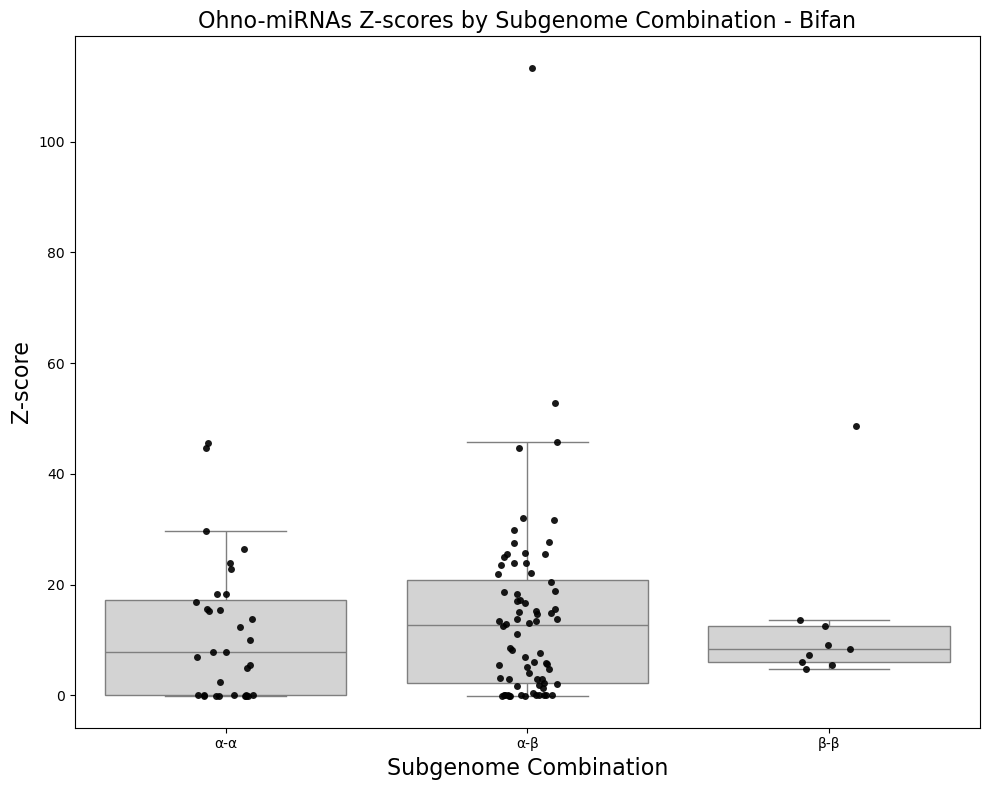

In [100]:
if 'subgenome_combination' in df_wgd_lca_parsed_subg.columns:
    df_wgd_lca_parsed_subg.drop(columns=['subgenome_combination'], inplace=True)

# Create a new column combining both subgenome labels, ignoring numbers and using Greek letters
df_wgd_lca_parsed_subg['subgenome_combination'] = df_wgd_lca_parsed_subg.apply(
    lambda row: '-'.join(sorted([row.iloc[-2].strip('12').replace('alpha', 'α').replace('beta', 'β'),
                                 row.iloc[-1].strip('12').replace('alpha', 'α').replace('beta', 'β')])), axis=1
)

# Boxplot of Z-scores grouped by subgenome combination
plt.figure(figsize=(10, 8))
sns.boxplot(x='subgenome_combination', y='Z-score', data=df_wgd_lca_parsed_subg, order=['α-α', 'α-β', 'β-β'], showfliers=False, color='lightgrey') 
sns.stripplot(x='subgenome_combination', y='Z-score', data=df_wgd_lca_parsed_subg, order=['α-α', 'α-β', 'β-β'], color='black', alpha=0.9, jitter=True)
plt.xlabel('Subgenome Combination', fontsize=16)
plt.ylabel('Z-score', fontsize=16)
plt.title('Ohno-miRNAs Z-scores by Subgenome Combination - Bifan', fontsize=16)
plt.tight_layout()
plt.show()

In [101]:
alpha_alpha = df_wgd_lca_parsed_subg[df_wgd_lca_parsed_subg['subgenome_combination'] == 'α-α']['Z-score'].astype(float)
alpha_beta = df_wgd_lca_parsed_subg[df_wgd_lca_parsed_subg['subgenome_combination'] == 'α-β']['Z-score'].astype(float)
beta_beta = df_wgd_lca_parsed_subg[df_wgd_lca_parsed_subg['subgenome_combination'] == 'β-β']['Z-score'].astype(float)
ks_stat_aa_ab, ks_p_value_aa_ab = stats.ks_2samp(alpha_alpha, alpha_beta)
ks_stat_ab_bb, ks_p_value_ab_bb = stats.ks_2samp(alpha_beta, beta_beta)
ks_stat_aa_bb, ks_p_value_aa_bb = stats.ks_2samp(alpha_alpha, beta_beta)

print(f"KS test results for subgenome combinations:\nnetwork={network}\ntarget_homology={target_homology}\nremove_pre_2R={remove_SSD_pre_2R}")
print(100 * "=")
print(f"KS statistic (α-α vs α-β): {ks_stat_aa_ab}, p-value: {ks_p_value_aa_ab}")
print(f"KS statistic (α-β vs β-β): {ks_stat_ab_bb}, p-value: {ks_p_value_ab_bb}")
print(f"KS statistic (α-α vs β-β): {ks_stat_aa_bb}, p-value: {ks_p_value_aa_bb}")

KS test results for subgenome combinations:
network=tarbase
target_homology=mix
remove_pre_2R=False
KS statistic (α-α vs α-β): 0.16319444444444445, p-value: 0.5426692479011911
KS statistic (α-β vs β-β): 0.3333333333333333, p-value: 0.2864347375537176
KS statistic (α-α vs β-β): 0.375, p-value: 0.20883805586667475


_____________________________________

In [133]:
dict_path = '../../1.1_retrieve_Hsa_ohnomirnas/ohnomirna_mgdb_to_gene.dic'

dic = {}
with open(dict_path) as f:
	for line in f:
		parts = line.strip().split('\t')
		if len(parts) == 2:
			dic[parts[1]] = parts[0]

In [103]:
avg_expr_matrix_path = '../../miRNATissueAtlas_expression/all_human_miRNA_rpmm_harmonized_meta_data.mgdb.csv'

with open(avg_expr_matrix_path) as f:
    lines = [line.strip().split('\t') for line in f.readlines()[:4]]
    
columns = list(zip(*lines))
merged_header = ['{},{}'.format(columns[i][0], ','.join(columns[i][1:])) for i in range(len(columns))]
h = '\t'.join(merged_header)

expr_df = pd.read_csv(avg_expr_matrix_path, index_col=None, sep='\t', header=None)
expr_df = expr_df.iloc[4:, :]
expr_df.columns = h.split('\t')
expr_df.set_index(expr_df.columns[0], inplace=True)
expr_df = expr_df[expr_df.index != 'unknown_mirna']
expr_df = expr_df[expr_df.index != 'premirna_not_in_mirgenedb']
expr_df = expr_df.apply(pd.to_numeric)
expr_df = expr_df.loc[:, expr_df.columns.str.endswith('mean')]

expr_df

/tmp/ipykernel_1680/224704369.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

,"EV,adipose,adipose,mean","EV,airway,epithelium,mean","EV,airway,pharynx,mean","EV,artery,artery,mean","EV,blood,GDM,mean","EV,blood,Molm14,mean","EV,blood,PBMC,mean","EV,blood,THP,mean","EV,blood,blood,mean","EV,blood,plasma,mean",...,"tissue,tongue,tongue,mean","tissue,tonsil,tonsil,mean","tissue,trachea,trachea,mean","tissue,umbilical_cord,huvec,mean","tissue,umbilical_cord,umbilical_cord,mean","tissue,urethra,urethra,mean","tissue,urine,urine,mean","tissue,uterus,uterus,mean","tissue,vaginal_tissue,vaginal_tissue,mean","tissue,vein,vein,mean"
"Biotype,Organ_system,Tissue,Metric",,,,,,,,,,,,,,,,,,,,,
Hsa-Let-7-P1b,1088.428021,243.546543,0.043313,219.914918,568.125633,194.249264,281.727338,42.597923,137.123529,565.522809,...,1485.267408,1012.027760,2450.948916,2259.509429,1271.972792,2476.532603,467.290950,1236.827140,2437.746786,776.000649
Hsa-Let-7-P1b,6.505383,4.492620,0.000000,47.933493,15.282738,2.515213,0.649421,0.401885,3.789879,3.072286,...,2.586946,5.930494,5.310115,11.823245,10.589435,4.679424,4.812450,6.962467,33.098248,4.027219
Hsa-Let-7-P1c,4.816620,0.000000,0.000000,44.683410,0.308100,12.401268,0.023610,0.000000,1.241202,1.098243,...,3.459201,5.605949,3.207017,11.017460,10.217927,4.434976,2.537118,1.827755,4.520438,1.293623
Hsa-Let-7-P1c,4765.081268,206.162963,0.557305,609.405956,87.788778,1595.478431,91.012267,197.572829,522.647640,1082.661796,...,4764.332005,2030.584158,8786.298873,2077.455856,1362.149626,8060.796190,1114.537047,2994.291358,12096.249358,2990.441585
Hsa-Let-7-P1d,0.582867,0.754825,0.000000,68.443741,0.179697,0.000000,0.000000,0.000000,0.469278,0.381515,...,0.365671,0.565189,1.068588,5.455957,2.780810,0.838106,7.392894,0.204405,1.249168,0.557457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsa-Mir-96-P2,2.985072,1043.589374,6.907106,47.118951,55.192044,33.070895,151.360592,150.744449,425.107901,529.451015,...,310.940806,8656.767830,377.471680,43.859254,1297.497460,123.201543,182.363125,1748.267031,220.295288,207.660570
Hsa-Mir-96-P3,0.000000,2.507751,0.000000,35.292801,1.349744,0.206051,0.037953,0.025759,1.006019,0.453172,...,12.403298,9.526723,1.988102,0.032581,4.613867,1.466685,1.849835,0.908452,2.879971,0.497193
Hsa-Mir-96-P3,0.747757,842.679437,5.148449,36.157231,34.706521,22.573360,13.384168,96.518346,150.865892,346.188089,...,219.570064,593.713919,112.203670,4.740391,437.259549,43.511656,77.749900,174.234731,93.439187,60.275389


In [104]:
def handle_duplicated_rows(df, strategy):

    if strategy not in {'mean', 'max', 'min'}:
        raise ValueError("Strategy must be one of: 'mean', 'max', 'min'")

    return df.groupby(df.index).agg(strategy)

def norm_column(df):
	return df.div(df.sum(axis=0), axis=1)

expr_df_avg = handle_duplicated_rows(expr_df, 'mean')
expr_df_avg_norm = norm_column(expr_df_avg)

# define expr_df_avg_norm_tissues keeping only the columns starting with 'tissue,'
expr_df_avg_norm_tissues = expr_df_avg_norm.filter(regex='^tissue,')
expr_df_avg_norm_tissues

,"tissue,adipose,adipose,mean","tissue,adrenal_gland,adrenal_gland,mean","tissue,airway,larynx,mean","tissue,airway,pharynx,mean","tissue,aqueous_humor,aqueous_humor,mean","tissue,artery,artery,mean","tissue,bladder,bladder,mean","tissue,blood,PBMC,mean","tissue,blood,blood,mean","tissue,blood,lymphocyte,mean",...,"tissue,tongue,tongue,mean","tissue,tonsil,tonsil,mean","tissue,trachea,trachea,mean","tissue,umbilical_cord,huvec,mean","tissue,umbilical_cord,umbilical_cord,mean","tissue,urethra,urethra,mean","tissue,urine,urine,mean","tissue,uterus,uterus,mean","tissue,vaginal_tissue,vaginal_tissue,mean","tissue,vein,vein,mean"
"Biotype,Organ_system,Tissue,Metric",,,,,,,,,,,,,,,,,,,,,
Hsa-Let-7-P1b,0.003006,1.341071e-03,0.000427,0.001442,0.000916,0.001651,0.001379,0.000528,2.510889e-04,0.000064,...,0.001616,0.000954,0.002101,4.072032e-03,0.002434,0.002025,0.001746,0.001941,0.002790,0.000756
Hsa-Let-7-P1c,0.009320,1.720682e-03,0.000749,0.009244,0.003374,0.001702,0.001416,0.001186,6.992792e-04,0.000152,...,0.005180,0.001908,0.007519,3.744203e-03,0.002605,0.006582,0.004132,0.004675,0.013663,0.002899
Hsa-Let-7-P1d,0.051787,1.908343e-02,0.008800,0.050816,0.011828,0.023311,0.014111,0.042700,1.867972e-02,0.007854,...,0.043681,0.027051,0.050558,2.744410e-02,0.017392,0.023730,0.019842,0.030553,0.034935,0.014337
Hsa-Let-7-P2a1,0.051944,1.911429e-02,0.008859,0.050890,0.011876,0.023442,0.014212,0.042739,1.869123e-02,0.007956,...,0.043825,0.027165,0.050718,2.752128e-02,0.017528,0.023835,0.019941,0.030621,0.034973,0.014380
Hsa-Let-7-P2a2,0.051944,1.911429e-02,0.008859,0.050890,0.011876,0.023442,0.014212,0.042739,1.869123e-02,0.007956,...,0.043825,0.027165,0.050718,2.752128e-02,0.017528,0.023835,0.019941,0.030621,0.034973,0.014380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsa-Mir-95,0.000220,3.392474e-04,0.000027,0.000250,0.000128,0.000034,0.000066,0.000015,9.052861e-06,0.000004,...,0.000317,0.000036,0.000055,2.250695e-06,0.000009,0.000056,0.000177,0.000018,0.000020,0.000056
Hsa-Mir-96-P1,0.000028,1.890656e-04,0.000329,0.000126,0.000026,0.000009,0.001300,0.000006,3.309033e-05,0.000083,...,0.000056,0.000036,0.000110,1.082577e-06,0.000421,0.000029,0.000267,0.000053,0.000086,0.000063
Hsa-Mir-96-P2,0.000083,5.264087e-04,0.022058,0.004191,0.000176,0.000659,0.004470,0.000249,2.581129e-03,0.001087,...,0.000341,0.008114,0.000324,7.864060e-05,0.002466,0.000101,0.000680,0.002728,0.000249,0.000201


In [112]:
def expression(df_wgd, expr_df, translation_dict):
	df_wgd_cp = df_wgd.copy()
	df_wgd_cp['miRNA_1_translated'] = df_wgd_cp['miRNA_1'].map(translation_dict)
	df_wgd_cp['miRNA_2_translated'] = df_wgd_cp['miRNA_2'].map(translation_dict)

	# Compute average expression values
	df_wgd_cp['avg_expr_1'] = df_wgd_cp['miRNA_1_translated'].apply(lambda x: expr_df.loc[x].mean() if x in expr_df.index else np.nan)
	df_wgd_cp['avg_expr_2'] = df_wgd_cp['miRNA_2_translated'].apply(lambda x: expr_df.loc[x].mean() if x in expr_df.index else np.nan)

	# Compute geometric distance between expression values
	df_wgd_cp['correlation'] = df_wgd_cp.apply(
		lambda row: stats.pearsonr(
			expr_df.loc[row['miRNA_1_translated']],
			expr_df.loc[row['miRNA_2_translated']]
		)[0] if pd.notna(row['avg_expr_1']) and pd.notna(row['avg_expr_2']) else np.nan,
		axis=1
	)

	df_wgd_cp['avg_expr_12'] = df_wgd_cp[['avg_expr_1', 'avg_expr_2']].mean(axis=1)

	# Clean temporary translated columns
	df_wgd_cp.drop(columns=['miRNA_1_translated', 'miRNA_2_translated'], inplace=True)

	return df_wgd_cp

df_wgd_lca_parsed_expr = expression(df_wgd_lca_parsed_subg, expr_df_avg_norm_tissues, dic)

In [113]:
df_wgd_lca_parsed_expr

,miRNA_1,miRNA_2,n_tar_1,n_tar_2,n_common_targets,mu,sigma,n_relevant_bifan,n_maj_true,Z-score,pValue (nm size=1000),lca,subg_1,subg_2,subgenome_combination,avg_expr_1,avg_expr_2,correlation,avg_expr_12
0,MIR101-1,MIR101-2,190,159,159,0.006,0.077227,0,1000,-0.077693,1.000000e+00,Euteleostomi,1alpha,2alpha,α-α,0.004677,0.004642,0.999975,0.004659
1,MIR103A1,MIR103A2,950,1075,950,2.990,1.744104,33,0,17.206539,3.394947e-09,Vertebrata,2beta,2alpha,α-β,0.004035,0.004040,0.999972,0.004038
2,MIR103A1,MIR107,950,959,927,2.576,1.635917,30,0,16.763688,2.413952e-09,Vertebrata,2beta,1alpha,α-β,0.004035,0.001629,0.654320,0.002832
3,MIR103A2,MIR107,1075,959,930,3.009,1.730005,30,0,15.601685,1.290864e-07,Euteleostomi,2alpha,1alpha,α-α,0.004040,0.001629,0.656097,0.002835
4,MIR106A,MIR106B,538,398,205,0.214,0.456294,3,0,6.105716,3.382723e-09,None,1beta,2beta,β-β,0.000191,0.000851,0.743482,0.000521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,MIRLET7A2,MIRLET7E,926,355,262,0.486,0.744180,5,1,6.065736,8.317223e-07,Euteleostomi,2beta,2alpha,α-β,0.030756,0.002038,0.610615,0.016397
109,MIRLET7C,MIRLET7E,328,355,247,0.085,0.289439,5,0,16.981119,0.000000e+00,Euteleostomi,1beta,2alpha,α-β,0.004946,0.002038,0.438255,0.003492
110,MIRLET7D,MIRLET7G,614,620,215,0.618,0.818582,1,448,0.466661,4.609786e-01,Bilateria,1alpha,1beta,α-β,0.002043,0.011590,0.097537,0.006817
111,MIRLET7D,MIRLET7I,614,478,202,0.383,0.651392,2,60,2.482378,7.045534e-03,Vertebrata,1alpha,2alpha,α-α,0.002043,0.011427,-0.017044,0.006735


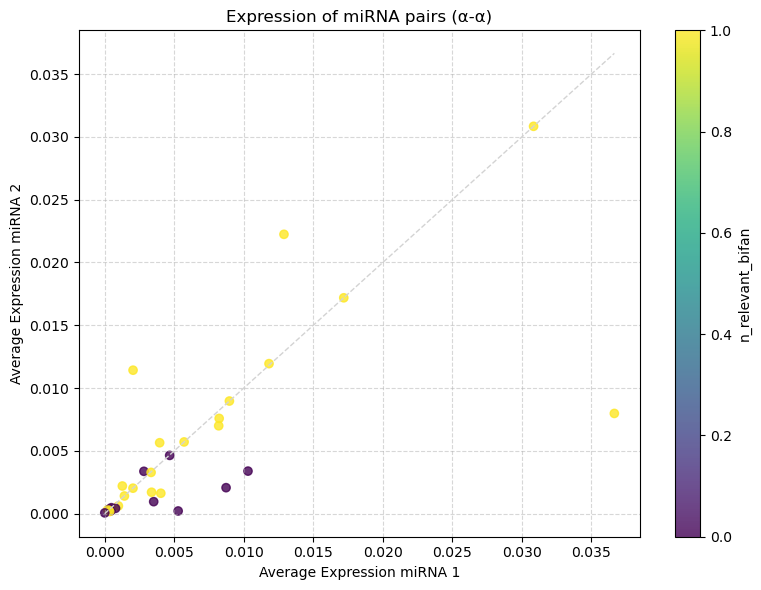

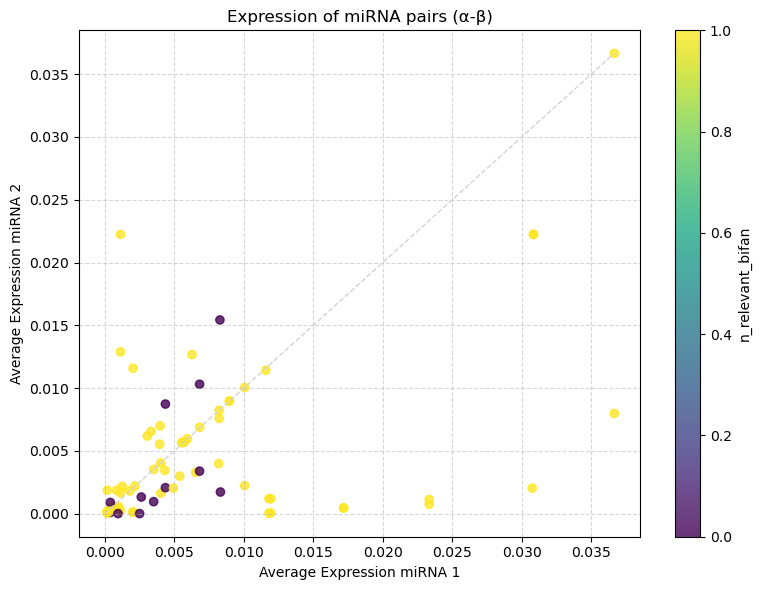

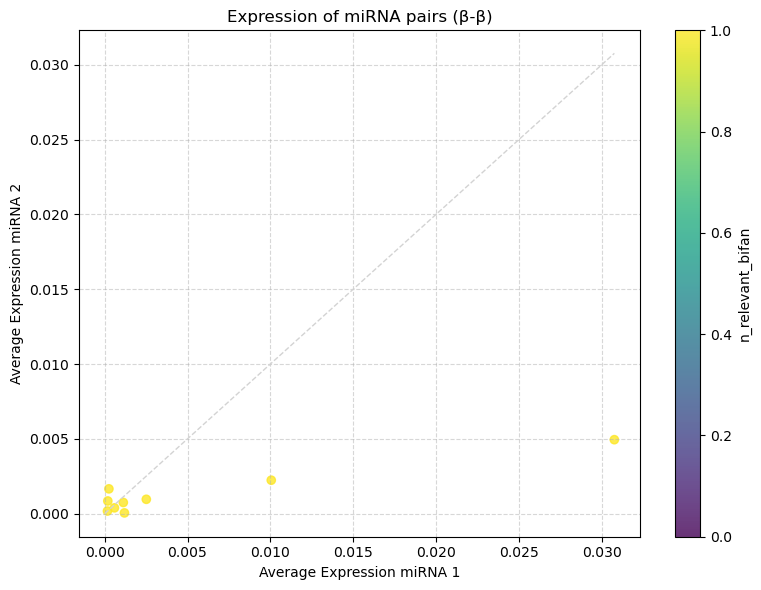

In [134]:
# Define min and max Z-score values for coloring
z_min, z_max = 0, 1

color_value = 'n_relevant_bifan'  # or 'Z-score' if you want to color by Z-score

# Make three plots, one for each subgenome combination, showing avg_expr_1 vs avg_expr_2, colored by Z-score
subgenome_combinations = df_wgd_lca_parsed_expr['subgenome_combination'].unique()
for subg_comb in subgenome_combinations:
    subg_df = df_wgd_lca_parsed_expr[df_wgd_lca_parsed_expr['subgenome_combination'] == subg_comb]

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        subg_df['avg_expr_1'], 
        subg_df['avg_expr_2'], 
        c=subg_df[color_value], 
        cmap='viridis', 
        alpha=0.8,
        vmin=z_min,    # lower boundary of colorbar
        vmax=z_max     # upper boundary of colorbar
    )
    plt.colorbar(scatter, label=color_value)
	# plot the bisector line
    plt.plot([0, max(subg_df['avg_expr_1'].max(), subg_df['avg_expr_2'].max())], 
			 [0, max(subg_df['avg_expr_1'].max(), subg_df['avg_expr_2'].max())],
			 color='lightgrey', linestyle='--', linewidth=1)
    plt.title(f'Expression of miRNA pairs ({subg_comb})')
    plt.xlabel('Average Expression miRNA 1')
    plt.ylabel('Average Expression miRNA 2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()